In [11]:
#Importa funções
from funcoesTermosol import *
from jacobi_gauss import *
from time import perf_counter

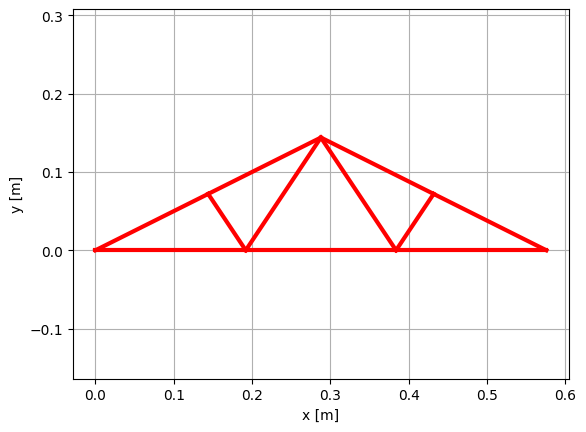

In [12]:
#Lê arquivo de entrada
nn,N,nm,Inc,nc,F,nr,R = importa('saida.xls')
plota(N,Inc)

In [13]:
#Cria os nos e elementos
nos = cria_nos(nn,N,F)
elementos = cria_elementos(nm,Inc,nos)

In [14]:
#Calcula as Matrizes de Rigidez
for elemento in elementos:
    matriz_rigidez = calcula_matriz_rigidez(elemento)
    elemento.setMatrizRigidez(matriz_rigidez)

In [15]:
#Calcula a matriz de rigidez universal
K_G = get_matriz_universal(nn,nm,elementos)
temp = K_G

In [16]:
#Inverte o array de R
R_invertido = np.zeros_like(R)
cont = len(R)-1
i = 0
while cont>=0:
    R_invertido[i] = R[cont]
    cont -=1
    i+=1

In [17]:
F_alterado = F
mask_K_G = np.ones(K_G.shape[0],bool)
mask_F = np.ones(K_G.shape[0],bool)
for restricao in R_invertido:
    mask_K_G[int(restricao[0])] = 0
    mask_F[int(restricao[0])] = 0

K_G_alterado = K_G[mask_K_G,:][:,mask_K_G]
F_alterado = F[mask_F,:]


In [18]:
t1_start = perf_counter()
U = np.linalg.inv(K_G_alterado)@F_alterado
t1_stop = perf_counter()
U2 = np.zeros_like(F)
cont = 0
for i in range(0,len(F)):
    if i not in R:
        U2[i] = U[cont]
        cont+=1

Reac = np.dot(temp,U2)
Reacoes_final = np.zeros_like(R)
cont = 0
for i in range(0,len(F)):
    if i in R:
        Reacoes_final[cont] = Reac[i]
        cont+=1

deformacoes,tensoes,forcas = get_lista_deformacoes_forcas_tensoes(U2,elementos)

geraSaida("Numpy",Reacoes_final,U2,deformacoes,forcas,tensoes)
print("Tempo Numpy : {}".format(t1_stop-t1_start))

Tempo Numpy : 0.0003431999357417226


In [19]:
t2_start = perf_counter()
U_jacobi = jacobi(K_G_alterado,F_alterado,10000,1e-20)
t2_stop = perf_counter()
U2_jacobi = np.zeros_like(F)
cont = 0
for i in range(0,len(F)):
    if i not in R:
        U2_jacobi[i] = U_jacobi[cont]
        cont+=1

Reac_jacobi = np.dot(temp,U2_jacobi)
Reacoes_final_jacobi = np.zeros_like(R)
cont = 0
for i in range(0,len(F)):
    if i in R:
        Reacoes_final_jacobi[cont] = Reac_jacobi[i]
        cont+=1

deformacoes_jacobi,tensoes_jacobi,forcas_jacobi = get_lista_deformacoes_forcas_tensoes(U2_jacobi,elementos)

geraSaida("Jacobi",Reacoes_final_jacobi,U2_jacobi,deformacoes_jacobi,forcas_jacobi,tensoes_jacobi)
print("Tempo Jacobi : {}".format(t2_stop-t2_start))

3.2485758756881127e+74
Tempo Jacobi : 0.6577354999026284


In [20]:
t3_start = perf_counter()
U_seidel = seidel(K_G_alterado,F_alterado,100000,1e-20)
t3_stop = perf_counter()
U2_seidel = np.zeros_like(F)
cont = 0
for i in range(0,len(F)):
    if i not in R:
        U2_seidel[i] = U_seidel[cont]
        cont+=1

Reac_seidel = np.dot(temp,U2_seidel)
Reacoes_final_seidel = np.zeros_like(R)
cont = 0
for i in range(0,len(F)):
    if i in R:
        Reacoes_final_seidel[cont] = Reac_seidel[i]
        cont+=1

deformacoes_seidel,tensoes_seidel,forcas_seidel = get_lista_deformacoes_forcas_tensoes(U2_seidel,elementos)

geraSaida("Seidel",Reacoes_final_seidel,U2_seidel,deformacoes_seidel,forcas_seidel,tensoes_seidel)
print("Tempo Seidel : {}".format(t3_stop-t3_start))

Tempo Seidel : 0.08415350003633648
